In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.cluster.cluster import *
import os
from src.test.evaluate import *

In [2]:
plot_dots('logs/mae/facebook/vit-mae-large/-8_100_facemae_0.75/results/latents_julie.npy', 'logs/mae/facebook/vit-mae-large/-8_100_facemae_0.75/results/states_julie.npy','logs/mae/facebook/vit-mae-large/-8_100_facemae_0.75/results/cluster_dots_test.png','pca','mae')

Saving plot to logs/mae/facebook/vit-mae-large/-8_100_facemae_0.75/results/cluster_dots_test.png


In [2]:
import numpy as np

# Load the npz file
data = np.load('data/processed/mae/craters_stats.npz')

# See what arrays are stored in it
print("Available arrays:", data.files)

# Or iterate through all arrays
for key in data.files:
    print(f"\n{key}:")
    print(f"  Shape: {data[key].shape}")
    print(f"  Dtype: {data[key].dtype}")
    print(f"  First few values: {data[key].flat[:5]}")  # First 5 values

Available arrays: ['mean', 'std']

mean:
  Shape: (3,)
  Dtype: float32
  First few values: [0.27261323 0.27261323 0.27261323]

std:
  Shape: (3,)
  Dtype: float32
  First few values: [0.0973839 0.0973839 0.0973839]


In [3]:
import numpy as np

# Load the npz file
data = np.load('data/processed/mae/craters_stats.npz')

# See what arrays are stored in it
print("Available arrays:", data.files)

# Or iterate through all arrays
for key in data.files:
    print(f"\n{key}:")
    print(f"  Shape: {data[key].shape}")
    print(f"  Dtype: {data[key].dtype}")
    print(f"  First few values: {data[key].flat[:5]}")  # First 5 values

Available arrays: ['mean', 'std']

mean:
  Shape: (3,)
  Dtype: float32
  First few values: [0.27261323 0.27261323 0.27261323]

std:
  Shape: (3,)
  Dtype: float32
  First few values: [0.0973839 0.0973839 0.0973839]


In [4]:
# Check what percentage of data is within expected ranges
import os
file_size = os.path.getsize('data/processed/mae/craters.npy')
bytes_per_image = 3 * 224 * 224 * 4  # 3 channels, 224x224, 4 bytes per float32
N = file_size // bytes_per_image

print(f"Calculated N = {N}")
data = np.memmap('data/processed/mae/craters.npy', dtype=np.float32, mode='r', shape=(N, 3, 224, 224))
sample = data[:1000].flatten()

within_1std = ((sample >= -1) & (sample <= 1)).mean()
within_2std = ((sample >= -2) & (sample <= 2)).mean()
within_3std = ((sample >= -3) & (sample <= 3)).mean()

print(f"Within ±1σ: {within_1std*100:.1f}% (expect ~68%)")
print(f"Within ±2σ: {within_2std*100:.1f}% (expect ~95%)")
print(f"Within ±3σ: {within_3std*100:.1f}% (expect ~99.7%)")

Calculated N = 1021843
Within ±1σ: 65.6% (expect ~68%)
Within ±2σ: 91.8% (expect ~95%)
Within ±3σ: 98.3% (expect ~99.7%)


In [2]:
BASE_DIR = "logs/mae/facebook/vit-mae-large/nofreeze_50_facemae_0.75_lower_lr_dataset_norm/results/"
OUTPUT_CSV = os.path.join(BASE_DIR, "cluster_metrics.csv")

# Verify files exist
print("Checking files...")
print(f"✓ latents_julie.npy exists: {os.path.exists(os.path.join(BASE_DIR, 'latents_julie_with_flip.npy'))}")
print(f"✓ states_julie.npy exists: {os.path.exists(os.path.join(BASE_DIR, 'states_julie.npy'))}")

Checking files...
✓ latents_julie.npy exists: True
✓ states_julie.npy exists: True


--- Running Cluster Comparison ---
Original latent dim: 1024
After PCA (95% variance): 56
Saved plots to logs/mae/facebook/vit-mae-large/nofreeze_50_facemae_0.75_lower_lr_dataset_norm/results/
col_0   0   1   2
row_0            
2       0   5   7
3       4  19  12
4      43  28  32
col_0         0         1         2
row_0                              
2      0.000000  0.416667  0.583333
3      0.114286  0.542857  0.342857
4      0.417476  0.271845  0.310680

Cluster similarity with Julie's ground truth:
Adjusted Rand Index (ARI): 0.036
Normalized Mutual Information (NMI): 0.084
Fowlkes–Mallows Index (FMI): 0.440

Saved metrics to logs/mae/facebook/vit-mae-large/nofreeze_50_facemae_0.75_lower_lr_dataset_norm/results/cluster_metrics.csv


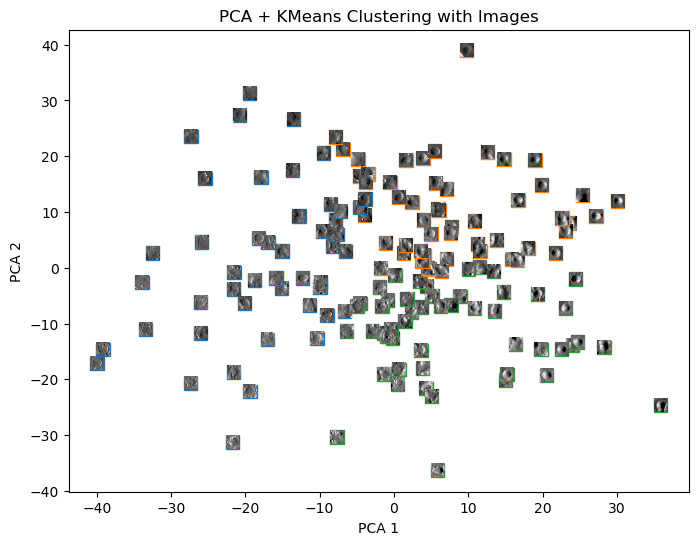

In [7]:
compare_clusters(
    technique='pca',        # or 'pca'
    cluster_method='kmeans',
    num_clusters=3,          # Julie has 4 states
    use_gpu=False,           # Set True if RAPIDS available
    out_dir=BASE_DIR
)

In [3]:
BASE_DIR = "logs/mae/facebook/vit-mae-large/-15_50_facemae_0.75_lower_lr_dataset_norm/results/"
OUTPUT_CSV = os.path.join(BASE_DIR, "cluster_metrics.csv")

# Verify files exist
print("Checking files...")
print(f"✓ latents_julie.npy exists: {os.path.exists(os.path.join(BASE_DIR, 'latents_julie_with_flip.npy'))}")
print(f"✓ states_julie.npy exists: {os.path.exists(os.path.join(BASE_DIR, 'states_julie_with_flip.npy'))}")

Checking files...
✓ latents_julie.npy exists: True
✓ states_julie.npy exists: True


--- Running Cluster Comparison ---
Original latent dim: 1024
After PCA (95% variance): 6
Saved plots to logs/mae/facebook/vit-mae-large/-15_50_facemae_0.75_lower_lr_dataset_norm/results/
col_0   0   1   2
row_0            
2       3   2   7
3      13   6  16
4      33  55  15
col_0         0         1         2
row_0                              
2      0.250000  0.166667  0.583333
3      0.371429  0.171429  0.457143
4      0.320388  0.533981  0.145631

Cluster similarity with Julie's ground truth:
Adjusted Rand Index (ARI): 0.115
Normalized Mutual Information (NMI): 0.094
Fowlkes–Mallows Index (FMI): 0.495

Saved metrics to logs/mae/facebook/vit-mae-large/-15_50_facemae_0.75_lower_lr_dataset_norm/results/cluster_metrics.csv


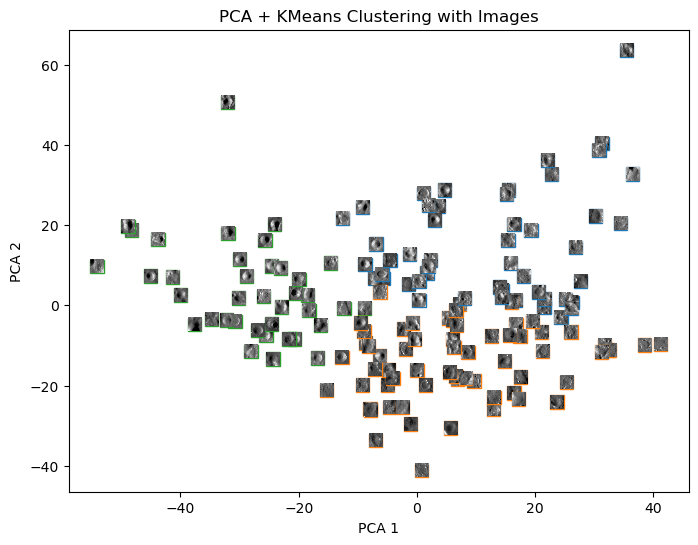

In [4]:
compare_clusters(
    technique='pca',        # or 'pca'
    cluster_method='kmeans',
    num_clusters=3,          # Julie has 4 states
    use_gpu=False,           # Set True if RAPIDS available
    out_dir=BASE_DIR
)

In [4]:
import pandas as pd

results_df = pd.read_csv(OUTPUT_CSV)
print("\n📊 Clustering Metrics:")
print(results_df.to_string(index=False))


📊 Clustering Metrics:
metric   value
   ARI -0.0212
   NMI  0.0400
   FMI  0.4224
